In [109]:
# %matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns



import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf

import geopandas as gpd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.facecolor'] = (1,1,1,1)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 4
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
# locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

# from datetime import date
import datetime


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

saveFigures is set to: True
Done loading packages


In [118]:
filePath= '../InternationalData/WHO_ExcessMortality2022/'
fileName = 'WHO_COVID_Excess_Deaths_EstimatesByCountry.xlsx'

# df = pd.read_excel(filePath+fileName)

sheet_to_df_map = pd.read_excel(filePath+fileName, sheet_name=None)

In [119]:
df =  sheet_to_df_map['Country by year and month']

In [120]:
df.columns = df.iloc[11]
df = df.iloc[12:]
df['cumul.excess.low'] = pd.to_numeric(df['cumul.excess.low'])
df['cumul.excess.high'] = pd.to_numeric(df['cumul.excess.high'])

C:\Users\rakrpe\AppData\Local\Temp\ipykernel_15620\2216490198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumul.excess.low'] = pd.to_numeric(df['cumul.excess.low'])
C:\Users\rakrpe\AppData\Local\Temp\ipykernel_15620\2216490198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumul.excess.high'] = pd.to_numeric(df['cumul.excess.high'])


In [121]:
dfDK = df[df.country == 'Denmark']
dfDE = df[df.country == 'Germany']

In [114]:
dfDK

dfDK.tail()

11,country,iso3,year,month,type,expected.mean,acm.mean,excess.mean,cumul.excess.mean,cumul.excess.low,cumul.excess.high
1183,Denmark,DNK,2021,8,Reported,4263,4793,530,1339,283,2269
1184,Denmark,DNK,2021,9,Reported,4178,4622,444,1783,734,2757
1185,Denmark,DNK,2021,10,Reported,4368,4993,625,2408,1358,3410
1186,Denmark,DNK,2021,11,Reported,4447,4995,548,2956,1886,3987
1187,Denmark,DNK,2021,12,Reported,4848,5609,761,3716,2601,4796


In [122]:

# # [print(x) for x in dfDK.iloc]
# dfDK['cumul.excess.low'] = pd.to_numeric(dfDK['cumul.excess.low'])
# dfDK['cumul.excess.high'] = pd.to_numeric(dfDK['cumul.excess.high'])

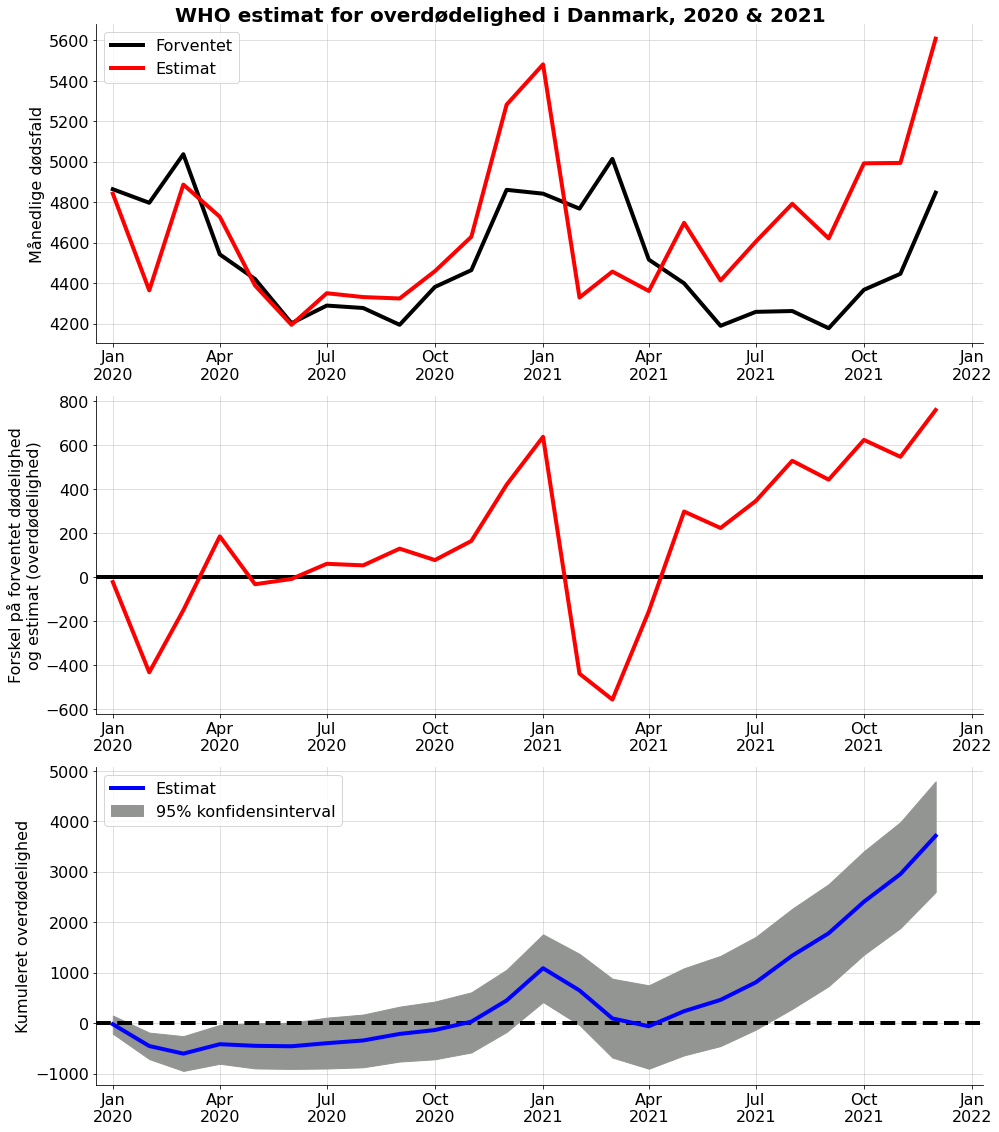

In [116]:
curDates = [np.datetime64(str(row.year)+'-'+(str(row.month).zfill(2))) for row in dfDK.iloc]

# fig,(ax,ax2,ax3) = plt.subplots(3,1,sharex=True,figsize=(14,16))
fig,(ax,ax2,ax3) = plt.subplots(3,1,figsize=(14,16))

# ax.step(curDates,dfDK['expected.mean'],'k',where='mid')
# ax.step(curDates,dfDK['acm.mean'],'r',where='mid')
ax.plot(curDates,dfDK['expected.mean'],'k',label='Forventet')
ax.plot(curDates,dfDK['acm.mean'],'r',label='Estimat')

ax2.axhline(0,color='k')
ax2.plot(curDates,dfDK['excess.mean'],'r')

ax3.axhline(0,color='k',linestyle='--',zorder=4)
ax3.plot(curDates,dfDK['cumul.excess.mean'],'b',zorder=5,label='Estimat')
ax3.fill_between(curDates,dfDK['cumul.excess.high'],dfDK['cumul.excess.low'],color='xkcd:grey',zorder=3,label='95% konfidensinterval')

# ax3.grid(axis='y',alpha=0.5)
ax.grid(alpha=0.5)
ax2.grid(alpha=0.5)
ax3.grid(alpha=0.5)
ax3.set_axisbelow(True)

ax.set_ylabel('Månedlige dødsfald')
ax2.set_ylabel('Forskel på forventet dødelighed\nog estimat (overdødelighed)')
ax3.set_ylabel('Kumuleret overdødelighed')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

ax.set_xlim([curDates[0]-np.timedelta64(14,'D'),curDates[-1]+np.timedelta64(40,'D')])
ax2.set_xlim([curDates[0]-np.timedelta64(14,'D'),curDates[-1]+np.timedelta64(40,'D')])
ax3.set_xlim([curDates[0]-np.timedelta64(14,'D'),curDates[-1]+np.timedelta64(40,'D')])


ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)  
ax2.spines['top'].set_visible(False) 
ax2.spines['right'].set_visible(False)  
ax3.spines['top'].set_visible(False) 
ax3.spines['right'].set_visible(False)  

ax.legend(loc='upper left')
ax3.legend(loc='upper left')

fig.suptitle('WHO estimat for overdødelighed i Danmark, 2020 & 2021',fontsize=20,fontweight='bold')
fig.tight_layout()

fig.savefig('../Figures/WHO_Danmark')


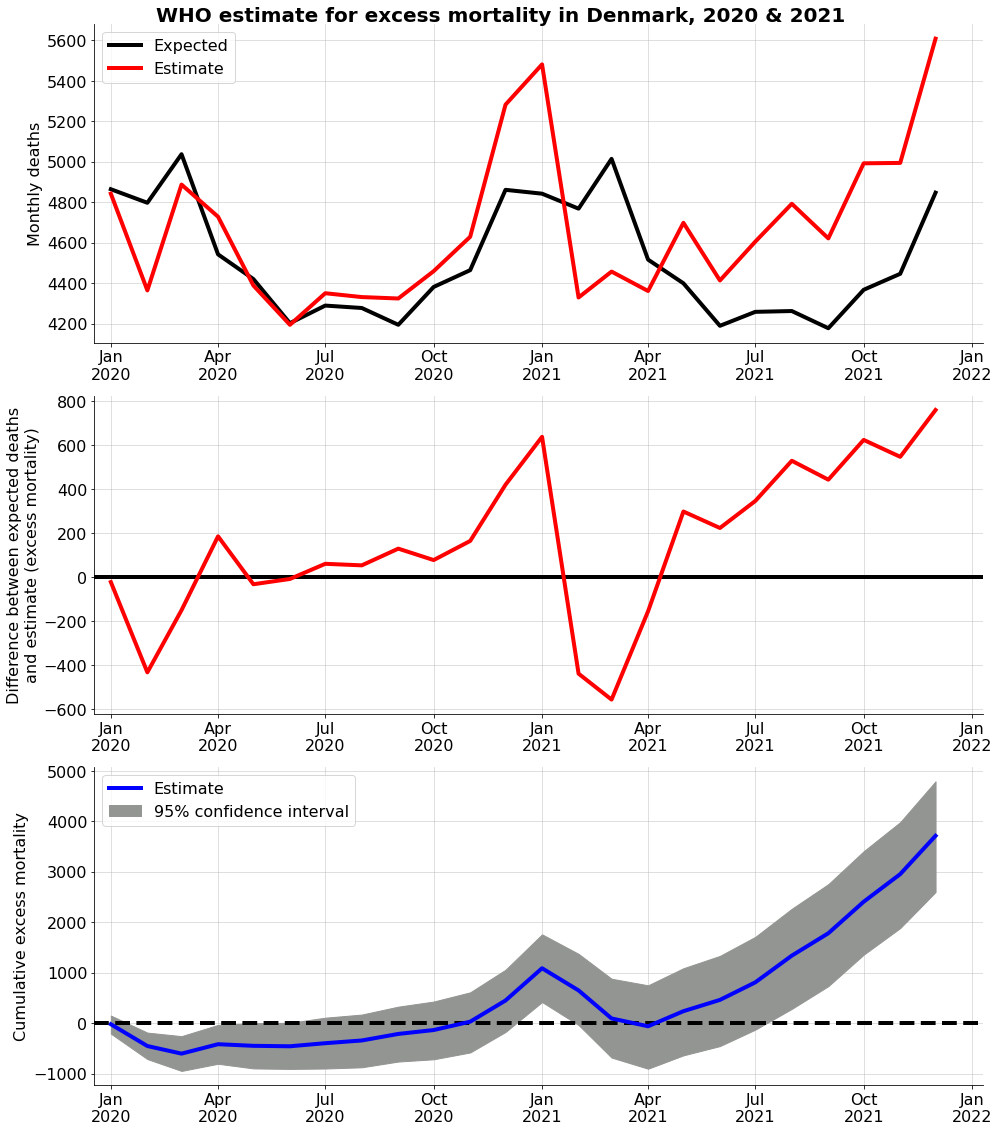

In [124]:
curDates = [np.datetime64(str(row.year)+'-'+(str(row.month).zfill(2))) for row in dfDK.iloc]

# fig,(ax,ax2,ax3) = plt.subplots(3,1,sharex=True,figsize=(14,16))
fig,(ax,ax2,ax3) = plt.subplots(3,1,figsize=(14,16))

# ax.step(curDates,dfDK['expected.mean'],'k',where='mid')
# ax.step(curDates,dfDK['acm.mean'],'r',where='mid')
ax.plot(curDates,dfDK['expected.mean'],'k',label='Expected')
ax.plot(curDates,dfDK['acm.mean'],'r',label='Estimate')

ax2.axhline(0,color='k')
ax2.plot(curDates,dfDK['excess.mean'],'r')

ax3.axhline(0,color='k',linestyle='--',zorder=4)
ax3.plot(curDates,dfDK['cumul.excess.mean'],'b',zorder=5,label='Estimate')
ax3.fill_between(curDates,dfDK['cumul.excess.high'],dfDK['cumul.excess.low'],color='xkcd:grey',zorder=3,label='95% confidence interval')

# ax3.grid(axis='y',alpha=0.5)
ax.grid(alpha=0.5)
ax2.grid(alpha=0.5)
ax3.grid(alpha=0.5)
ax3.set_axisbelow(True)

ax.set_ylabel('Monthly deaths')
ax2.set_ylabel('Difference between expected deaths\nand estimate (excess mortality)')
ax3.set_ylabel('Cumulative excess mortality')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

ax.set_xlim([curDates[0]-np.timedelta64(14,'D'),curDates[-1]+np.timedelta64(40,'D')])
ax2.set_xlim([curDates[0]-np.timedelta64(14,'D'),curDates[-1]+np.timedelta64(40,'D')])
ax3.set_xlim([curDates[0]-np.timedelta64(14,'D'),curDates[-1]+np.timedelta64(40,'D')])


ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)  
ax2.spines['top'].set_visible(False) 
ax2.spines['right'].set_visible(False)  
ax3.spines['top'].set_visible(False) 
ax3.spines['right'].set_visible(False)  

ax.legend(loc='upper left')
ax3.legend(loc='upper left')

# fig.suptitle('WHO estimat for overdødelighed i Danmark, 2020 & 2021',fontsize=20,fontweight='bold')
fig.suptitle('WHO estimate for excess mortality in Denmark, 2020 & 2021',fontsize=20,fontweight='bold')
fig.tight_layout()

fig.savefig('../Figures/WHO_Denmark')


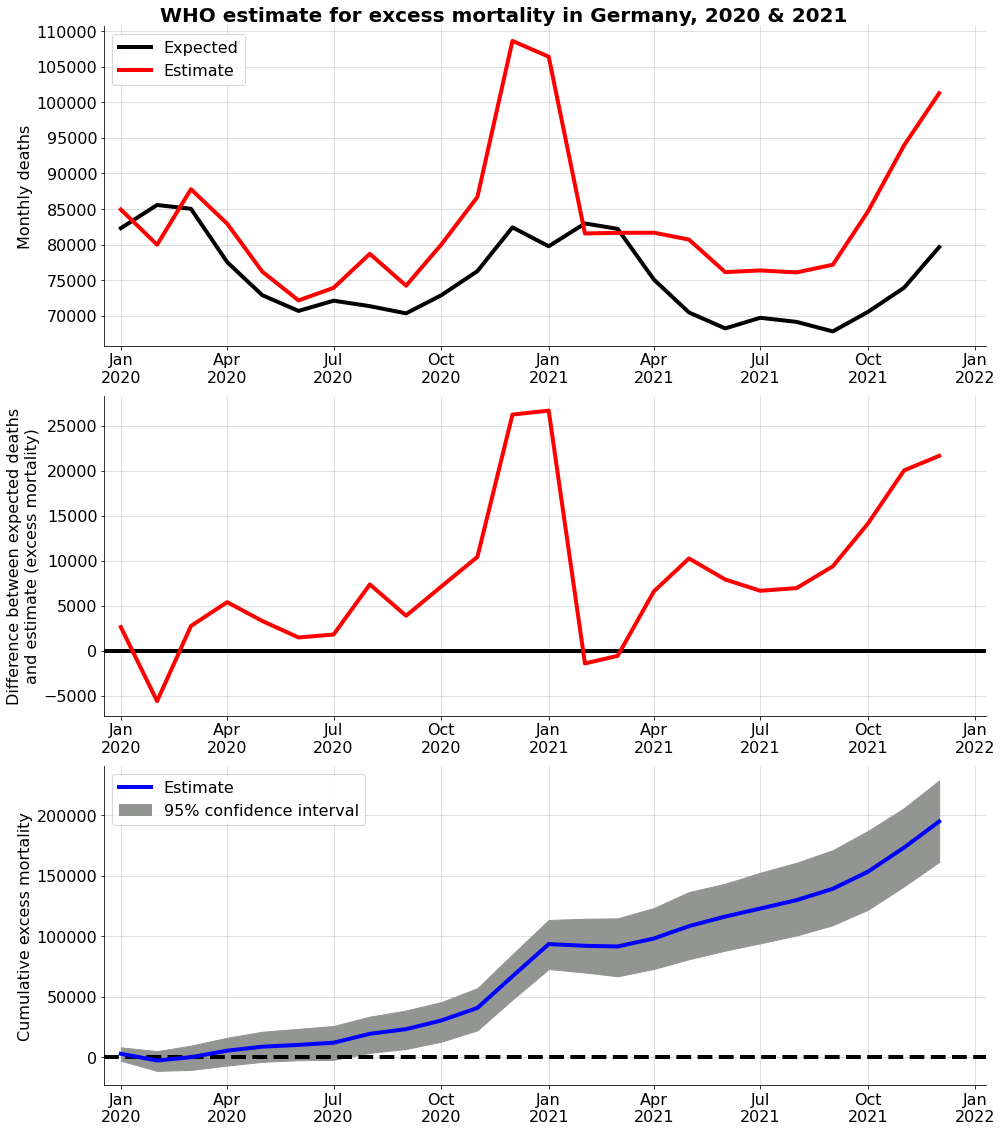

In [125]:
curDates = [np.datetime64(str(row.year)+'-'+(str(row.month).zfill(2))) for row in dfDE.iloc]

# fig,(ax,ax2,ax3) = plt.subplots(3,1,sharex=True,figsize=(14,16))
fig,(ax,ax2,ax3) = plt.subplots(3,1,figsize=(14,16))

# ax.step(curDates,dfDE['expected.mean'],'k',where='mid')
# ax.step(curDates,dfDE['acm.mean'],'r',where='mid')
ax.plot(curDates,dfDE['expected.mean'],'k',label='Expected')
ax.plot(curDates,dfDE['acm.mean'],'r',label='Estimate')

ax2.axhline(0,color='k')
ax2.plot(curDates,dfDE['excess.mean'],'r')

ax3.axhline(0,color='k',linestyle='--',zorder=4)
ax3.plot(curDates,dfDE['cumul.excess.mean'],'b',zorder=5,label='Estimate')
ax3.fill_between(curDates,dfDE['cumul.excess.high'],dfDE['cumul.excess.low'],color='xkcd:grey',zorder=3,label='95% confidence interval')

# ax3.grid(axis='y',alpha=0.5)
ax.grid(alpha=0.5)
ax2.grid(alpha=0.5)
ax3.grid(alpha=0.5)
ax3.set_axisbelow(True)

ax.set_ylabel('Monthly deaths')
ax2.set_ylabel('Difference between expected deaths\nand estimate (excess mortality)')
ax3.set_ylabel('Cumulative excess mortality')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

ax.set_xlim([curDates[0]-np.timedelta64(14,'D'),curDates[-1]+np.timedelta64(40,'D')])
ax2.set_xlim([curDates[0]-np.timedelta64(14,'D'),curDates[-1]+np.timedelta64(40,'D')])
ax3.set_xlim([curDates[0]-np.timedelta64(14,'D'),curDates[-1]+np.timedelta64(40,'D')])


ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)  
ax2.spines['top'].set_visible(False) 
ax2.spines['right'].set_visible(False)  
ax3.spines['top'].set_visible(False) 
ax3.spines['right'].set_visible(False)  

ax.legend(loc='upper left')
ax3.legend(loc='upper left')

# fig.suptitle('WHO estimat for overdødelighed i Danmark, 2020 & 2021',fontsize=20,fontweight='bold')
fig.suptitle('WHO estimate for excess mortality in Germany, 2020 & 2021',fontsize=20,fontweight='bold')
fig.tight_layout()

fig.savefig('../Figures/WHO_Germany')
